In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\abalone.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Converting sex column into numerical value

In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
converted = lab_enc.fit_transform(data["Sex"])
datanew = pd.DataFrame(converted)
datanew.head(10)

,0
0,2
1,2
2,0
3,2
4,1
5,1
6,0
7,0
8,2
9,0


In [9]:
data['Sex'] = converted

In [10]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking how the data is distributed for every column

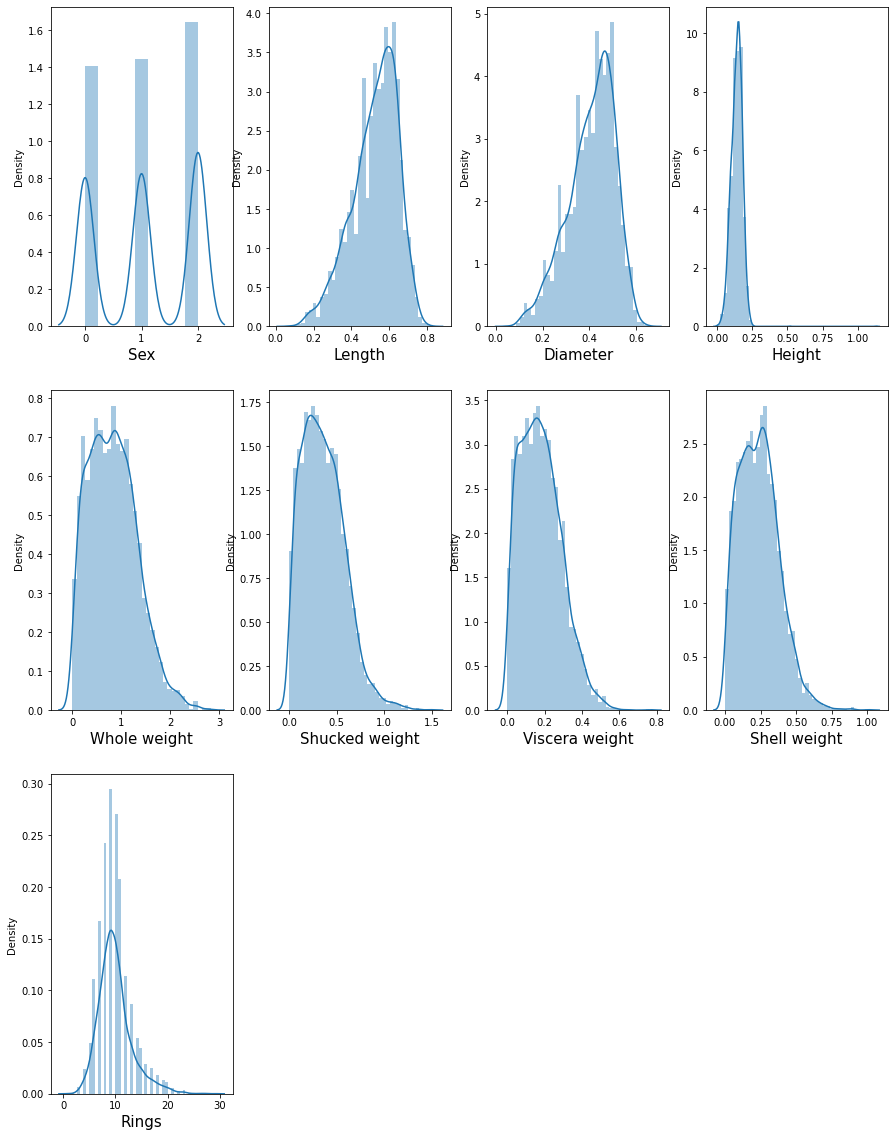

In [11]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=10 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

## Checking on outliers

<AxesSubplot:>

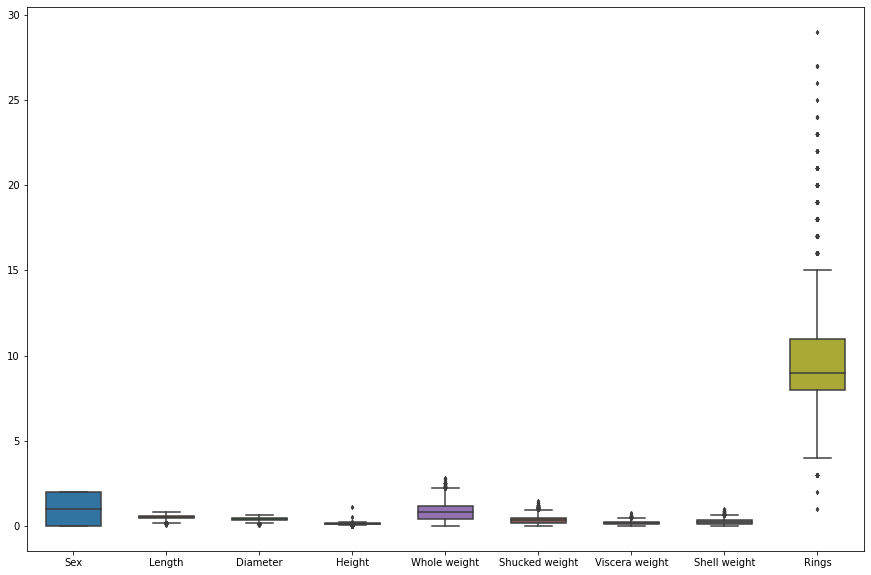

In [13]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.6,ax=ax,fliersize=3)

In [29]:
data = data[data['Height'] < 0.4] #treating the outlier

<AxesSubplot:>

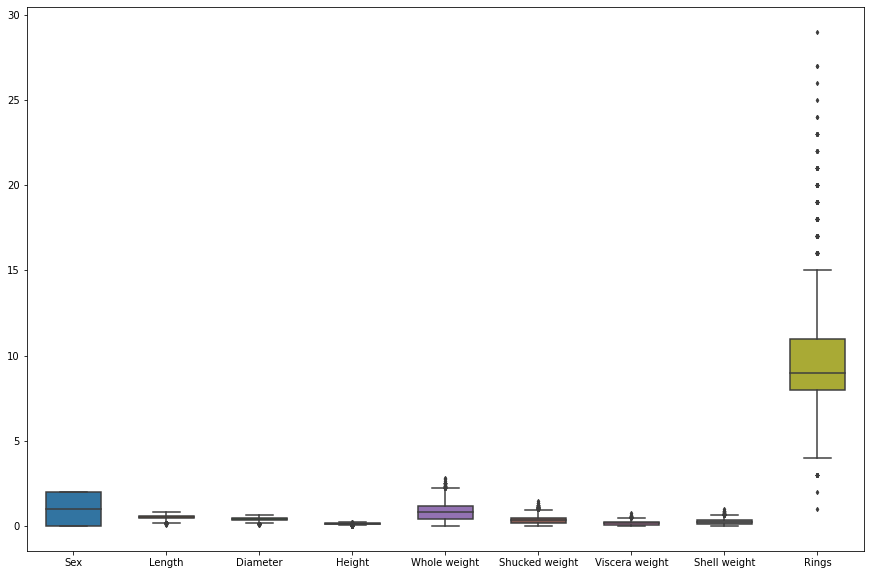

In [30]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.6,ax=ax,fliersize=3)

## Visualising the the feature on that of the label

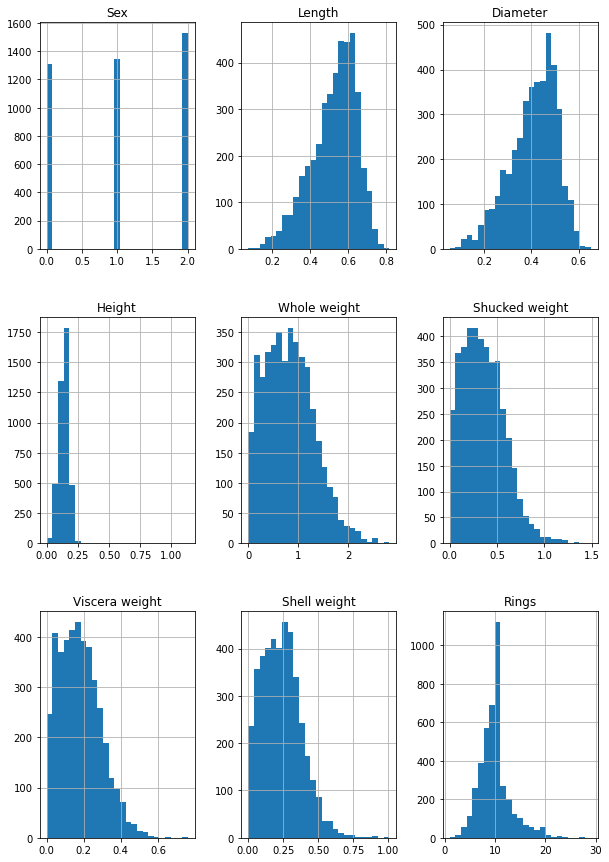

In [15]:
data.hist(figsize=(10,15) , bins = 25)
plt.show()

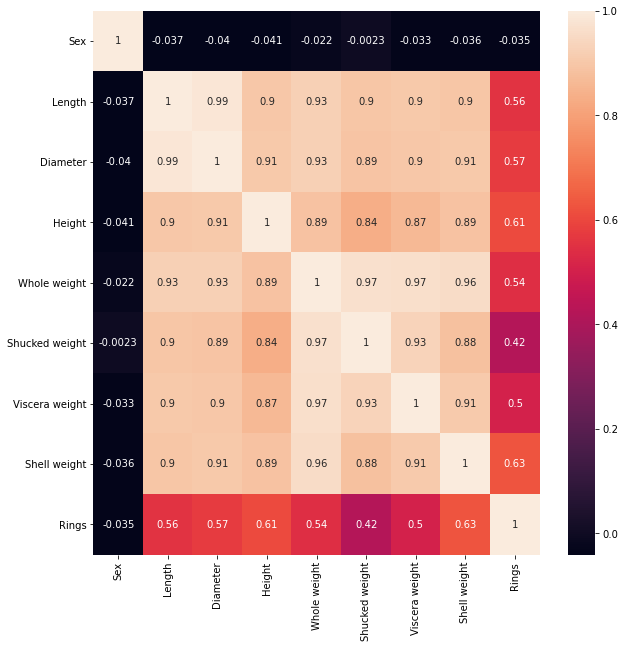

In [33]:
plt.figure(figsize=(10, 10))
corr = data.corr()
_ = sns.heatmap(corr, annot=True)

In [16]:
X = data.drop(columns="Rings") #Apart from rings, all are features
y = data["Rings"] #Rings is the label

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=405)

# Using Randomized Forrest

In [34]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf=RandomForestClassifier()

params = {'n_estimators' : [11,13],
         'criterion' : ['entropy'],
         'max_depth': [12,16],
         'min_samples_split' : [8,9],
         'min_samples_leaf' : [5,6]
         }
grd= GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>',grd.best_params_)

clf=grd.best_estimator_ #reinstantiating with best params

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print('conf_mat = >','\n',rf_conf_mat)
print('Accuracy rf Normal =>',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 13}
conf_mat = > 
 [[ 1  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  9 10  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 11 19 26  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 22 33 37  8  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 19 51 30 20  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8 43 58 46 16  2  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7 22 45 50 24  1  4  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 10 20 32 38  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  6 11 21 12  1  6  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  6 20 12  4  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  6 11  7  4  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  7  7  1  

In [35]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.38      0.73      0.50        11
           5       0.35      0.28      0.31        32
           6       0.28      0.32      0.30        59
           7       0.31      0.30      0.31       109
           8       0.28      0.38      0.32       133
           9       0.30      0.32      0.31       181
          10       0.21      0.32      0.26       158
          11       0.29      0.35      0.31       109
          12       0.04      0.02      0.02        64
          13       0.17      0.13      0.15        54
          14       0.00      0.00      0.00        34
          15       0.50      0.04      0.07        27
          16       0.50      0.10      0.17        20
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         4
          20       0.00    

# Using KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.2430622009569378

In [37]:
## Using bagging
from sklearn.ensemble import BaggingClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=7),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [38]:
bag_knn.oob_score

True

In [39]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=7),
                           n_estimators = 10, max_samples = 0.5,
                           bootstrap=False, random_state=3)

In [40]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.2641148325358852

### Using Bagging itself the data and score looks better.

# Using Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=3)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.67      0.40      0.50         5
           4       0.25      0.36      0.30        11
           5       0.27      0.31      0.29        32
           6       0.17      0.15      0.16        59
           7       0.26      0.23      0.24       109
           8       0.23      0.26      0.24       133
           9       0.26      0.24      0.25       181
          10       0.23      0.23      0.23       158
          11       0.18      0.18      0.18       109
          12       0.12      0.14      0.13        64
          13       0.07      0.07      0.07        54
          14       0.08      0.06      0.07        34
          15       0.06      0.07      0.06        27
          16       0.00      0.00      0.00        20
          17       0.29      0.20      0.24        20
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         4
          20       0.00    